In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)
import seaborn as sns

**Loading and investigating Dataset**

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Function to reduce memory usage**

In [4]:
def reduce_mem_usage(df):
    """ 
        iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [5]:
reduce_mem_usage(df)

Memory usage of dataframe is 0.39 MB
Memory usage after optimization is: 0.06 MB
Decreased by 85.7%


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int8    
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int16   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int8    
 6   Education                 1470 non-null   int8    
 7   EducationField            1470 non-null   category
 8   EmployeeCount             1470 non-null   int8    
 9   EmployeeNumber            1470 non-null   int16   
 10  EnvironmentSatisfaction   1470 non-null   int8    
 11  Gender                    1470 non-null   category
 12  HourlyRate                1470 non-null   int8    
 13  JobInvolvement            1470 non-null   int8  

Now the dataset is much simple and optimized

In [7]:
pd.set_option('display.max_columns', None)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


-  From data frame description above we can see that:
    1. Column EmployeeNumber is not usefull for us
    2. Columns EmployeeCount and StandardHours only have one value for all data 
    3. There are alot of columns that are catigorical that we can use label encoding and one hot encoding on them

First, let's get rid of unuseful columns

In [8]:
df.drop(columns = ['EmployeeCount','EmployeeNumber','StandardHours'],inplace=True)

In [9]:
categorical = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
              'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','JobLevel','StockOptionLevel']

for item in categorical:
    df[item] = df[item].astype('category')

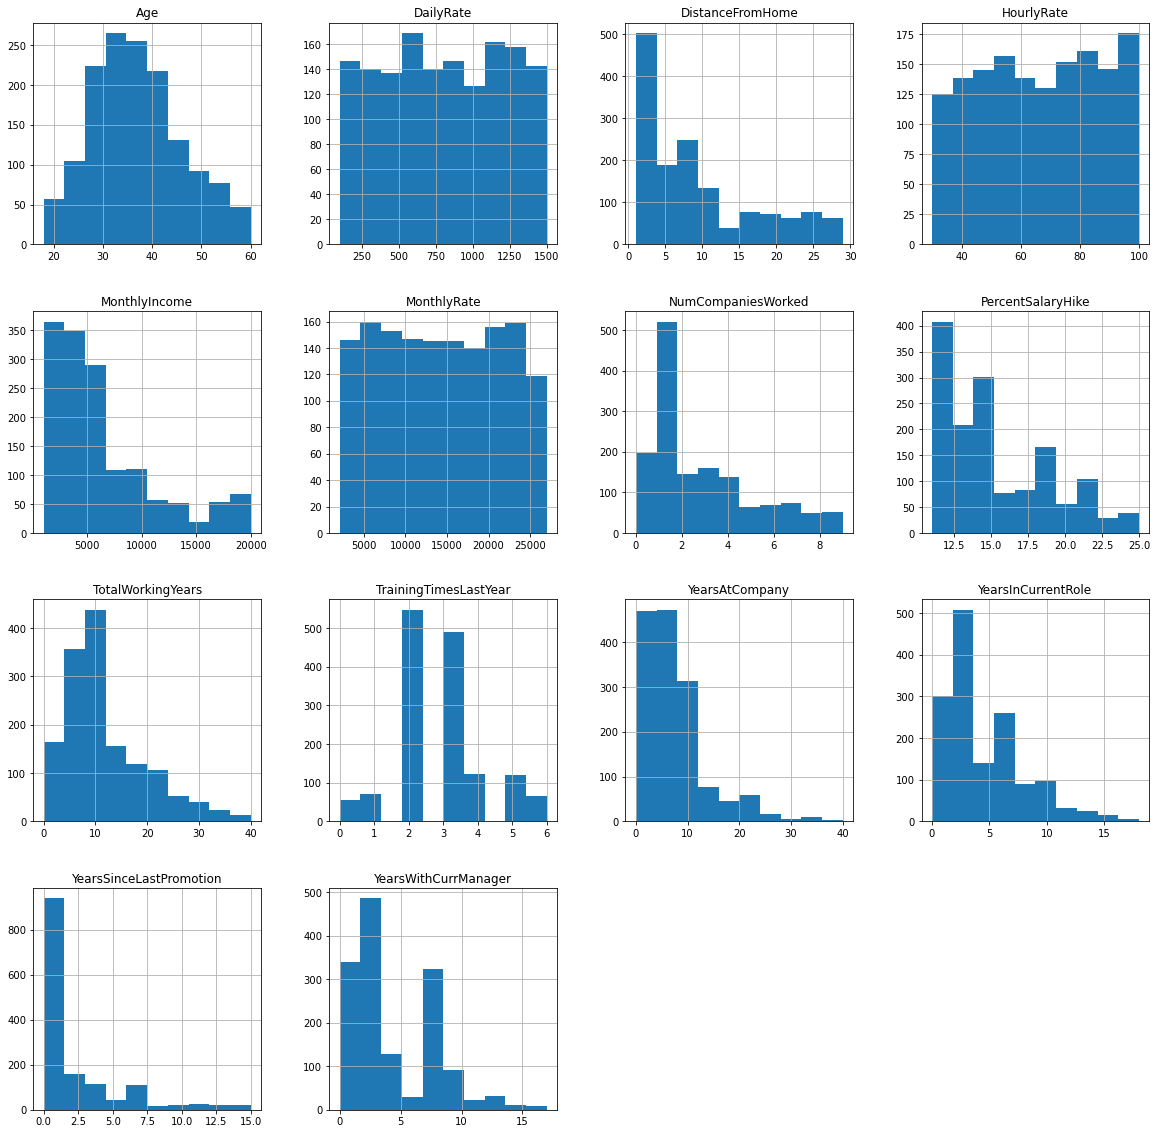

In [10]:
df.hist(figsize=(20,20));

**Investigating categorical columns and extraxt ordinal and nominal features**

In [11]:
categorical = []
for item in df.columns:
    if df[item].dtype == 'category':
        categorical.append(item)
categorical        

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [12]:
for item in categorical:
    print('-------------------------------')
    print(item)  
    print(df[item].value_counts())
    print('')

-------------------------------
Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64

-------------------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

-------------------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

-------------------------------
Education
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

-------------------------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

-------------------------------
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

-------------------------------
Gender
Male      882
Female    588
Name: Gender, dtype: int64



-  From description above we can see that:
    1. The Over18 column has to be removed since it have only one value
    2. We have to separate the ordinal categories and the nominal ones to preprocess them differently    
    3. The target column Attrition is so biased and we need to upsample the data

**1. Drop the Over18 column**

In [13]:
df.drop(columns=['Over18'],inplace=True)

**2. Separate ordinal, nominal and numerical**

In [14]:
onehot = ['Department','EducationField','Gender','MaritalStatus','JobRole','OverTime']

In [15]:
ordinal = list(set(categorical) - set(onehot))
ordinal.remove('Over18')
ordinal

['StockOptionLevel',
 'Education',
 'EnvironmentSatisfaction',
 'BusinessTravel',
 'JobLevel',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance',
 'JobSatisfaction',
 'Attrition',
 'JobInvolvement']

In [16]:
num = df.drop(columns=ordinal,axis=1)
num = num.drop(columns=onehot,axis=1)
num = list(num)
num

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [17]:
ordinal.remove('Attrition')

In [18]:
df['Attrition'].replace({'Yes': 1, 'No': 0},inplace=True)

**3. Upsampling the data**

In [19]:
from sklearn.utils import resample
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from IPython.display import Image

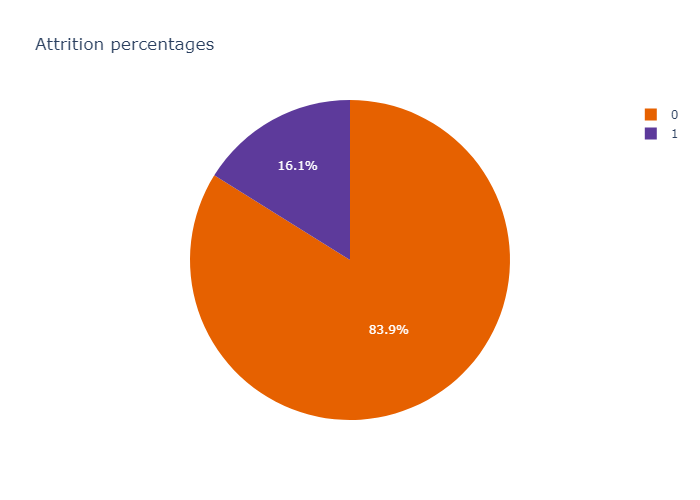

In [21]:
fig = px.pie(df, names='Attrition', title='Attrition percentages',color_discrete_sequence=['#E66100','#5D3A9B'])

fig.show(renderer='png')

In [22]:
att_true = df[df['Attrition'] == 1]
att_false = df[df['Attrition'] == 0]
print(att_true.shape)
print(att_false.shape)

(237, 31)
(1233, 31)


In [23]:
true_upsampled = resample(att_true,n_samples=len(att_false),random_state=42)
print(true_upsampled.shape)

(1233, 31)


In [24]:
df_upsampled = pd.concat([att_false, true_upsampled])

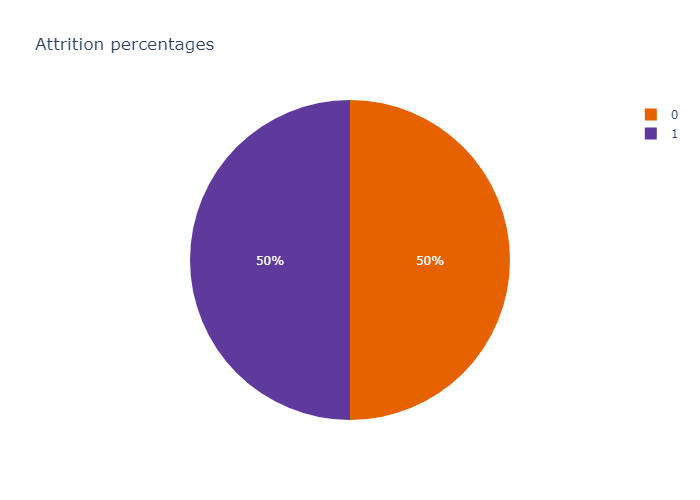

In [25]:
import plotly.express as px
fig = px.pie(df_upsampled, names='Attrition', title='Attrition percentages',color_discrete_sequence=['#E66100','#5D3A9B'])
fig.show('png')

In [26]:
df_upsampled = df_upsampled.sample(frac=1).reset_index()
df_upsampled = df_upsampled.drop('index',axis=1)
df_upsampled.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Non-Travel,906,Research & Development,5,2,Life Sciences,1,Male,95,2,1,Research Scientist,1,Divorced,2107,20293,6,No,17,3,1,1,5,2,1,1,0,0,0
1,36,0,Travel_Rarely,796,Research & Development,12,5,Medical,4,Female,51,2,3,Manufacturing Director,4,Single,8858,15669,0,No,11,3,2,0,15,2,2,14,8,7,8
2,25,0,Travel_Rarely,977,Research & Development,2,1,Other,4,Male,57,3,1,Laboratory Technician,3,Divorced,3977,7298,6,Yes,19,3,3,1,7,2,2,2,2,0,2
3,38,0,Travel_Rarely,119,Sales,3,3,Life Sciences,1,Male,76,3,3,Sales Executive,3,Divorced,10609,9647,0,No,12,3,3,2,17,6,2,16,10,5,13
4,32,1,Travel_Rarely,414,Sales,2,4,Marketing,3,Male,82,2,2,Sales Executive,2,Single,9907,26186,7,Yes,12,3,3,0,7,3,2,2,2,2,2


**Nice!! now we have the data with balanced target value**

In [27]:
def heatmap_draw(df):
    plt.figure(figsize=(18, 7))
    # define the mask to set the values in the upper triangle to True
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

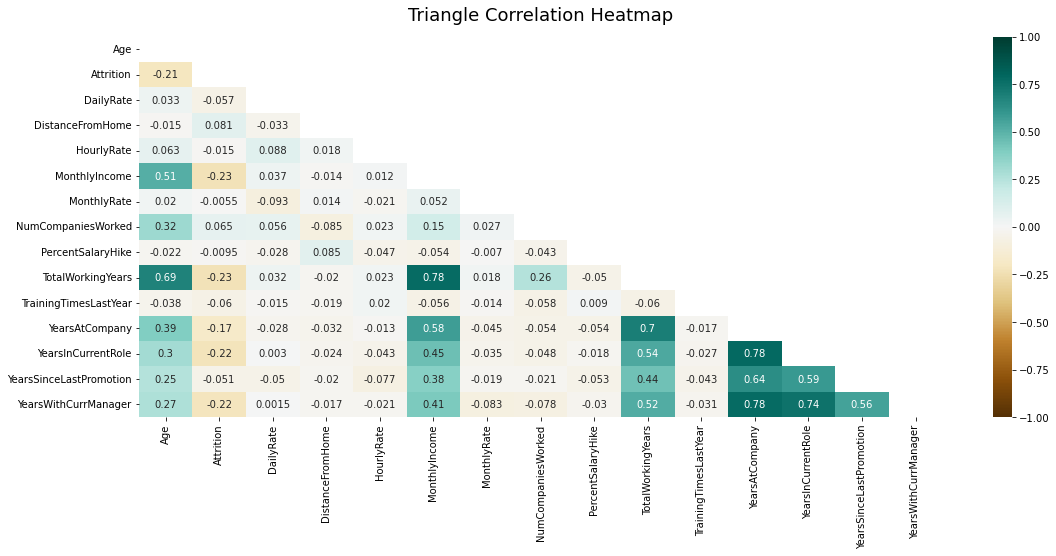

In [28]:
heatmap_draw(df_upsampled)

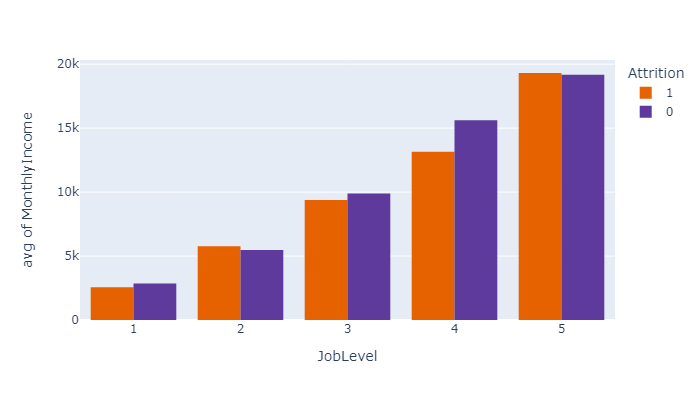

In [29]:
import plotly.express as px

fig = px.histogram(df_upsampled, x="JobLevel", y="MonthlyIncome",
             color='Attrition', barmode='group',
             histfunc='avg',
             color_discrete_sequence=['#E66100','#5D3A9B'],
             height=400)
fig.show('png')

We can see very strong correlation between JobLevel and the average Monthely income for employees but we can't really know if there is effict on the attrition

Ok let's see if the job role has an effict on the attrition

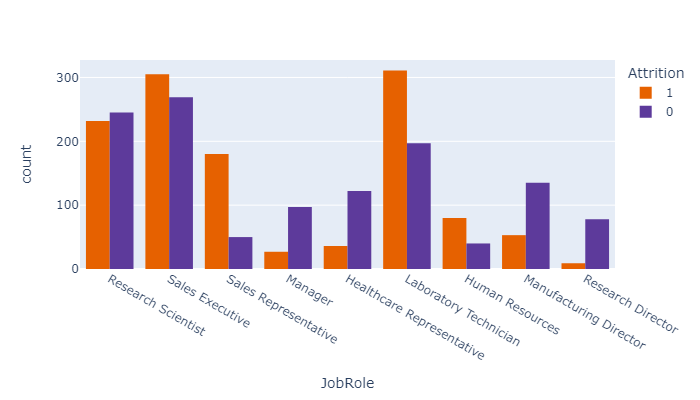

In [30]:
fig = px.histogram(df_upsampled, x="JobRole", 
#                    y="MonthlyIncome",
             color='Attrition', barmode='group',
#              histfunc='avg',
             color_discrete_sequence=['#E66100','#5D3A9B'],
             height=400)
fig.show('png')

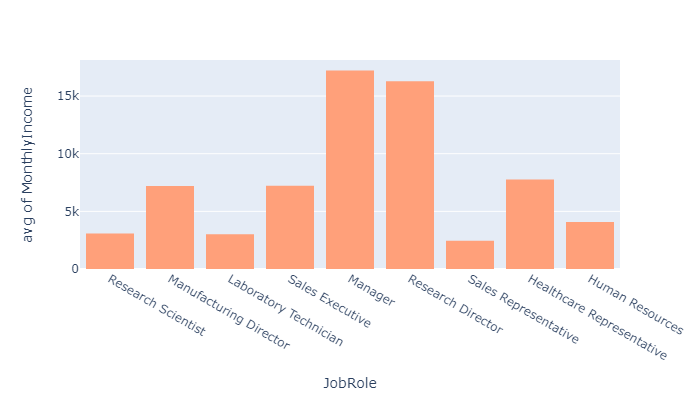

In [31]:
fig = px.histogram(df_upsampled, x="JobRole", 
             y="MonthlyIncome",
#              color='Attrition',
                barmode='group',
              histfunc='avg',
             color_discrete_sequence=['lightsalmon'],
             height=400)
fig.show('png')

We can see Clearly from the two figures before that the job roles with high salaries have lower attrition rate 

## Pre-Processing for model

**Splitting the data to train and test**

In [155]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, valid_index in split.split(df_upsampled, df_upsampled['Attrition']):
    strat_train_set = df_upsampled.loc[train_index]
    strat_valid_set = df_upsampled.loc[valid_index]

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [157]:
X_train,X_test,y_train,y_test = strat_train_set.drop('Attrition',axis=1),strat_valid_set.drop('Attrition',axis=1),\
                                    strat_train_set['Attrition'],strat_valid_set['Attrition']

In [158]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1972, 30), (494, 30), (1972,), (494,))

### Preprocesssing step using pipeline

In [161]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

pipeline = ColumnTransformer([
    ('num',StandardScaler(),num),
    ('odrinal',OrdinalEncoder(),ordinal),
    ('onehot',OneHotEncoder(),onehot),
])

X_train_prepared = pipeline.fit_transform(X_train)

In [163]:
X_test_prepared = pipeline.transform(X_test)

### Models
1. LogisticRegressionCV
2. SGDClassifier
3. LinearSVC
4. RandomForestsClassifier

helper function to compare between models

In [164]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

def show_scores(y, pred):
    print('Accuracy :',accuracy_score(y,pred))
    print('Precision :',precision_score(y,pred))
    print('Recall :',recall_score(y,pred))    

**Logistic regression model**

In [165]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


log_reg = LogisticRegressionCV(max_iter= 10000,random_state=42)

cross_val_score(log_reg,X_train_prepared,y_train,cv=3,scoring='accuracy')

array([0.77355623, 0.7564688 , 0.77625571])

In [166]:
log_reg.fit(X_train_prepared,y_train)

LogisticRegressionCV(max_iter=10000, random_state=42)

In [167]:
log_reg_pred = log_reg.predict(X_test_prepared)

In [168]:
show_scores(y_test,log_reg_pred)

Accuracy : 0.7935222672064778
Precision : 0.7675276752767528
Recall : 0.8421052631578947


**SGDClassifier**

In [169]:
from sklearn.linear_model import SGDClassifier


sgd_clf = SGDClassifier(random_state=42)
cross_val_score(sgd_clf,X_train_prepared,y_train,cv=3,scoring='accuracy')

array([0.73708207, 0.75951294, 0.67427702])

In [170]:
sgd_clf.fit(X_train_prepared,y_train)

SGDClassifier(random_state=42)

In [171]:
sgd_pred = sgd_clf.predict(X_test_prepared)

In [172]:
show_scores(y_test,sgd_pred)

Accuracy : 0.742914979757085
Precision : 0.7439024390243902
Recall : 0.7408906882591093


**LinearSVC**

In [173]:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC(random_state=42,max_iter=10000)
cross_val_score(lin_svc,X_train_prepared,y_train,cv=3,scoring='accuracy')

array([0.76443769, 0.74429224, 0.77929985])

In [174]:
lin_svc.fit(X_train_prepared,y_train)

LinearSVC(max_iter=10000, random_state=42)

In [175]:
lin_svc_pred = lin_svc.predict(X_test_prepared)

In [176]:
show_scores(y_test,lin_svc_pred)

Accuracy : 0.8036437246963563
Precision : 0.7777777777777778
Recall : 0.8502024291497976


**RandomForestsClassifier**

In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]

forest_class = RandomForestClassifier()
grid_search = GridSearchCV(forest_class,param_grid,cv = 5,
                          scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(X_train_prepared,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [178]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_features=2, n_estimators=10)

In [179]:
rand_forest_pred = grid_search.predict(X_test_prepared)

In [180]:
show_scores(y_test,rand_forest_pred)

Accuracy : 0.9858299595141701
Precision : 0.9838709677419355
Recall : 0.9878542510121457


Wow the random forest classifier got really good scores!!